# Game Recomendations on Steam Platform 

Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler

DataFiles

In [2]:
# Read the data from files
path = 'data'
df_games = pd.read_csv(path+"/games.csv")
df_users = pd.read_csv(path+"/users.csv")
df_recommendations = pd.read_csv(path+"/recommendations.csv")
df_genre = pd.read_json(path+'/games_metadata.json', lines=True)

Overview

In [3]:
df_games.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [4]:
df_users.head(10)

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
5,5664667,145,5
6,5889167,447,2
7,7281762,1083,1
8,7445952,273,1
9,7462927,51,1


In [5]:
df_recommendations.head(10)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
5,306130,0,0,2021-10-10,True,8.6,45425,5
6,238960,0,0,2017-11-25,True,538.8,88282,6
7,730,0,0,2021-11-30,False,157.5,63209,7
8,255710,0,0,2021-05-21,True,18.7,354512,8
9,289070,0,0,2020-05-26,True,397.5,454422,9


In [6]:
df_genre.head(10)

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
5,250180,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller..."
6,253980,Experience incredibly atmospheric and intense ...,"[RPG, Action, Fantasy, Third Person, Hack and ..."
7,271850,,"[Strategy, Simulation, Action, RTS, World War II]"
8,282900,"Packed with fast-paced, turn-based RPG action,...","[Anime, JRPG, Female Protagonist, Cute, RPG, S..."
9,19810,Lead a team of domestic counter-terrorism expe...,"[Action, Tactical]"


In [7]:
#Metadata of Dataframes
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB

📄 DataFrame: df_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (tot

In [8]:
# Converting all object columns to string dtype
df_games = df_games.astype({col: 'string' for col in df_games.select_dtypes(include='object').columns})
df_genre = df_genre.astype({col: 'string' for col in df_genre.select_dtypes(include='object').columns})

# Converting the date related columns to date dtype
df_games['date_release'] = pd.to_datetime(df_games['date_release'])
df_recommendations['date'] = pd.to_datetime(df_recommendations['date'])

In [9]:
#Metadata of Dataframes after datatype conversions
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          50872 non-null  int64         
 1   title           50872 non-null  string        
 2   date_release    50872 non-null  datetime64[ns]
 3   win             50872 non-null  bool          
 4   mac             50872 non-null  bool          
 5   linux           50872 non-null  bool          
 6   rating          50872 non-null  string        
 7   positive_ratio  50872 non-null  int64         
 8   user_reviews    50872 non-null  int64         
 9   price_final     50872 non-null  float64       
 10  price_original  50872 non-null  float64       
 11  discount        50872 non-null  float64       
 12  steam_deck      50872 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(3), int64(3), string(2)
memory usage: 3.7 MB

In [10]:
for name, df in df_list:
    print(f"Total No. of records in \n📄 DataFrame: {name}")
    print(df.shape[0])

Total No. of records in 
📄 DataFrame: df_games
50872
Total No. of records in 
📄 DataFrame: df_users
14306064
Total No. of records in 
📄 DataFrame: df_recommendations
41154794
Total No. of records in 
📄 DataFrame: df_genre
50872


In [11]:
#Checking for Null Values
for name, df in df_list:
    print(f"\n📄 DataFrame Null Values: {name}")
    print(df.isna().sum())


📄 DataFrame Null Values: df_games
app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

📄 DataFrame Null Values: df_users
user_id     0
products    0
reviews     0
dtype: int64

📄 DataFrame Null Values: df_recommendations
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

📄 DataFrame Null Values: df_genre
app_id         0
description    0
tags           0
dtype: int64


In [12]:
#Checking for 'app_id' Duplicate Values in all dataframes
for name, df in df_list:
    if 'app_id' in df:
        print(f'Total records count in {name} 📄: ',df.shape[0])
        print(f'Distinct app_id records in {name} 📄: ',df['app_id'].nunique())
        
#Checking for 'user_id' Duplicate Values in df_users
print(f'Total records count in df_users 📄: ',df_users.shape[0])
print(f'Distinct user_id records in df_users 📄: ',df_users['user_id'].nunique()) 

#Checking for duplicated based on combination of app_id & their description
print(f'Total duplicate records count in df_games 📄: ',df_games.duplicated(subset=['app_id', 'title']).sum())
print(f'Total duplicate records count in df_genre 📄: ',df_genre.duplicated(subset=['app_id','description']).sum())     
        

Total records count in df_games 📄:  50872
Distinct app_id records in df_games 📄:  50872
Total records count in df_recommendations 📄:  41154794
Distinct app_id records in df_recommendations 📄:  37610
Total records count in df_genre 📄:  50872
Distinct app_id records in df_genre 📄:  50872
Total records count in df_users 📄:  14306064
Distinct user_id records in df_users 📄:  14306064
Total duplicate records count in df_games 📄:  0
Total duplicate records count in df_genre 📄:  0


Data Preprocessing

In [13]:
#Focusing only on the games available on macos
counts = df_games['mac'].value_counts()
print(counts)

mac
False    37854
True     13018
Name: count, dtype: int64


In [14]:
df_games_processed = df_games.copy()
df_games_processed = df_games_processed[df_games_processed['mac'] == True]

In [15]:
df_games_processed

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
13,29180,Osmos,2009-08-18,True,True,True,Very Positive,88,532,9.99,9.99,0.0,True
18,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,True,True,True,Very Positive,84,294,0.89,2.99,70.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50830,2195430,Two Point Campus: Medical School,2023-08-17,True,True,True,Mixed,50,22,10.00,0.00,0.0,True
50835,2446110,Stacklands: Cursed Worlds,2023-07-25,True,True,False,Very Positive,90,62,4.00,0.00,0.0,True
50848,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,True,True,True,Mixed,67,80,5.00,0.00,0.0,True
50851,1555150,Pocket Bravery,2023-08-31,True,True,True,Very Positive,89,248,20.00,0.00,0.0,True


In [16]:
df_games_processed.drop(columns=['win', 'mac','linux','steam_deck','positive_ratio', 'discount', 'price_original'], inplace=True)

In [17]:

# Define custom order from worst to best (if reversed)
order = ["Overwhelmingly Positive", "Very Positive", "Positive", "Mostly Positive",
         "Mixed", "Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"][::-1]

# Initialize encoder with the custom order
enc = OrdinalEncoder(categories=[order])

# Transform the 'rating' column to ordinal values
df_games_processed[['rating']] = enc.fit_transform(df_games_processed[['rating']])

In [18]:
df_games_processed

,app_id,title,date_release,rating,user_reviews,price_final
2,113020,Monaco: What's Yours Is Mine,2013-04-24,7.0,3722,14.99
4,249050,Dungeon of the ENDLESS™,2014-10-27,7.0,8784,11.99
6,253980,Enclave,2013-10-04,5.0,1608,4.99
13,29180,Osmos,2009-08-18,7.0,532,9.99
18,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,7.0,294,0.89
...,...,...,...,...,...,...
50830,2195430,Two Point Campus: Medical School,2023-08-17,4.0,22,10.00
50835,2446110,Stacklands: Cursed Worlds,2023-07-25,7.0,62,4.00
50848,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,4.0,80,5.00
50851,1555150,Pocket Bravery,2023-08-31,7.0,248,20.00


In [19]:
games_processed = pd.merge(df_games_processed, df_genre[['app_id', 'tags']], on='app_id', how='inner')

In [20]:
games_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13018 entries, 0 to 13017
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        13018 non-null  int64         
 1   title         13018 non-null  string        
 2   date_release  13018 non-null  datetime64[ns]
 3   rating        13018 non-null  float64       
 4   user_reviews  13018 non-null  int64         
 5   price_final   13018 non-null  float64       
 6   tags          13018 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(2), string(2)
memory usage: 712.1 KB


In [21]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,tags
0,113020,Monaco: What's Yours Is Mine,2013-04-24,7.0,3722,14.99,"['Co-op', 'Stealth', 'Indie', 'Heist', 'Local ..."
1,249050,Dungeon of the ENDLESS™,2014-10-27,7.0,8784,11.99,"['Roguelike', 'Strategy', 'Tower Defense', 'Pi..."
2,253980,Enclave,2013-10-04,5.0,1608,4.99,"['RPG', 'Action', 'Fantasy', 'Third Person', '..."
3,29180,Osmos,2009-08-18,7.0,532,9.99,"['Indie', 'Casual', 'Puzzle', 'Relaxing', 'Sin..."
4,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,7.0,294,0.89,"['Action', 'RPG', 'FPS', 'Co-op', 'Shooter', '..."
...,...,...,...,...,...,...,...
13013,2195430,Two Point Campus: Medical School,2023-08-17,4.0,22,10.00,[]
13014,2446110,Stacklands: Cursed Worlds,2023-07-25,7.0,62,4.00,"['Simulation', 'Indie', 'Casual', 'Survival', ..."
13015,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,4.0,80,5.00,"['Strategy', 'Indie', 'Simulation']"
13016,1555150,Pocket Bravery,2023-08-31,7.0,248,20.00,[]


In [22]:
games_processed['tags'] = games_processed['tags'].str.replace(r"[\[\]\{\}'\"]", "", regex=True)

In [23]:
games_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13018 entries, 0 to 13017
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        13018 non-null  int64         
 1   title         13018 non-null  string        
 2   date_release  13018 non-null  datetime64[ns]
 3   rating        13018 non-null  float64       
 4   user_reviews  13018 non-null  int64         
 5   price_final   13018 non-null  float64       
 6   tags          13018 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(2), string(2)
memory usage: 712.1 KB


In [24]:
games_processed = games_processed.astype({col: 'string' for col in games_processed.select_dtypes(include='object').columns})
#Ensuring tags are lists
games_processed['tags'] = games_processed['tags'].fillna('').str.split(', ')

#Fit-transform into a dense array
mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(games_processed['tags'])

#Build one-hot DataFrame with the same index
genre_encoded = pd.DataFrame(
    tag_matrix,
    columns=[f"{t}" for t in mlb.classes_],
    index=games_processed.index    # ← correct usage
)

#Concatenate back
games_processed = pd.concat(
    [games_processed.drop('tags', axis=1), genre_encoded],
    axis=1
)


In [25]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,,1980s,1990s,2.5D,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,113020,Monaco: What's Yours Is Mine,2013-04-24,7.0,3722,14.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,249050,Dungeon of the ENDLESS™,2014-10-27,7.0,8784,11.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,253980,Enclave,2013-10-04,5.0,1608,4.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29180,Osmos,2009-08-18,7.0,532,9.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,7.0,294,0.89,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13013,2195430,Two Point Campus: Medical School,2023-08-17,4.0,22,10.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13014,2446110,Stacklands: Cursed Worlds,2023-07-25,7.0,62,4.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13015,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,4.0,80,5.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13016,1555150,Pocket Bravery,2023-08-31,7.0,248,20.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Choose the numeric columns to normalize
numeric_cols = ['rating', 'user_reviews', 'price_final']

# Fit scaler and transform
scaler = MinMaxScaler()
games_processed[numeric_cols] = scaler.fit_transform(games_processed[numeric_cols])


In [27]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,,1980s,1990s,2.5D,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,113020,Monaco: What's Yours Is Mine,2013-04-24,0.875,0.000495,0.055521,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,249050,Dungeon of the ENDLESS™,2014-10-27,0.875,0.001171,0.044409,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,253980,Enclave,2013-10-04,0.625,0.000213,0.018482,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29180,Osmos,2009-08-18,0.875,0.000070,0.037001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,0.875,0.000038,0.003296,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13013,2195430,Two Point Campus: Medical School,2023-08-17,0.500,0.000002,0.037038,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13014,2446110,Stacklands: Cursed Worlds,2023-07-25,0.875,0.000007,0.014815,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13015,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,0.500,0.000009,0.018519,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13016,1555150,Pocket Bravery,2023-08-31,0.875,0.000032,0.074077,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
trail_games = games_processed[games_processed['date_release'].dt.year >= 2022]

In [37]:
trail_games

,app_id,title,date_release,rating,user_reviews,price_final,,1980s,1990s,2.5D,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
12,1872790,Luckitown,2022-01-19,0.875,0.000020,0.018482,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,498310,RPG in a Box,2022-05-10,0.875,0.000019,0.111078,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,914890,Nine Noir Lives,2022-09-07,0.750,0.000004,0.074040,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119,1124080,Active DBG: Brave's Rage,2023-02-01,0.875,0.000021,0.066632,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,1482860,Idle Research,2022-07-31,0.875,0.000129,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13013,2195430,Two Point Campus: Medical School,2023-08-17,0.500,0.000002,0.037038,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13014,2446110,Stacklands: Cursed Worlds,2023-07-25,0.875,0.000007,0.014815,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13015,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,0.500,0.000009,0.018519,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13016,1555150,Pocket Bravery,2023-08-31,0.875,0.000032,0.074077,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:

common_game_ids = trail_games['app_id'].unique()   # all game IDs in df2
recommendations_df = df_recommendations[df_recommendations['app_id'].isin(common_game_ids)].copy()

In [40]:
trial_2 = recommendations_df[recommendations_df['date'].dt.year >= 2022]

In [41]:
trial_2.count()

app_id            441327
helpful           441327
funny             441327
date              441327
is_recommended    441327
hours             441327
user_id           441327
review_id         441327
dtype: int64

In [42]:
trial_2

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
36,1794680,0,0,2022-11-23,True,55.8,337740,36
58,602960,0,0,2022-01-05,True,41.9,737481,58
94,602960,0,0,2022-11-25,True,95.5,1336022,94
212,1794680,0,0,2022-02-15,True,36.5,11451916,212
218,1794680,0,0,2022-11-23,True,29.8,11647534,218
...,...,...,...,...,...,...,...,...
41154463,1451940,0,0,2022-04-18,True,5.0,12978439,41154463
41154498,1060230,0,0,2022-07-26,True,4.0,5565052,41154498
41154521,1404850,0,0,2022-12-31,True,7.0,3031438,41154521
41154594,1324780,0,0,2022-11-08,True,57.0,10526383,41154594


In [43]:
recommendations = recommendations_df[recommendations_df['date'].dt.year >= 2022]

In [44]:
recommendations.count()

app_id            441327
helpful           441327
funny             441327
date              441327
is_recommended    441327
hours             441327
user_id           441327
review_id         441327
dtype: int64

In [45]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
36,1794680,0,0,2022-11-23,True,55.8,337740,36
58,602960,0,0,2022-01-05,True,41.9,737481,58
94,602960,0,0,2022-11-25,True,95.5,1336022,94
212,1794680,0,0,2022-02-15,True,36.5,11451916,212
218,1794680,0,0,2022-11-23,True,29.8,11647534,218
...,...,...,...,...,...,...,...,...
41154463,1451940,0,0,2022-04-18,True,5.0,12978439,41154463
41154498,1060230,0,0,2022-07-26,True,4.0,5565052,41154498
41154521,1404850,0,0,2022-12-31,True,7.0,3031438,41154521
41154594,1324780,0,0,2022-11-08,True,57.0,10526383,41154594


In [46]:
#Droping the review_id column & coverting booolean to numeric
recommendations.drop(columns=['review_id'], inplace=True)
recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)

C:\Users\amrut\AppData\Local\Temp\ipykernel_14396\740696962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations.drop(columns=['review_id'], inplace=True)
C:\Users\amrut\AppData\Local\Temp\ipykernel_14396\740696962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)


In [47]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id
36,1794680,0,0,2022-11-23,1,55.8,337740
58,602960,0,0,2022-01-05,1,41.9,737481
94,602960,0,0,2022-11-25,1,95.5,1336022
212,1794680,0,0,2022-02-15,1,36.5,11451916
218,1794680,0,0,2022-11-23,1,29.8,11647534
...,...,...,...,...,...,...,...
41154463,1451940,0,0,2022-04-18,1,5.0,12978439
41154498,1060230,0,0,2022-07-26,1,4.0,5565052
41154521,1404850,0,0,2022-12-31,1,7.0,3031438
41154594,1324780,0,0,2022-11-08,1,57.0,10526383


In [48]:
count = (recommendations['hours'] < 2).sum()
count

43482

In [49]:
recommendations_df = recommendations[recommendations['hours'] > 2].copy()

In [50]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id
36,1794680,0,0,2022-11-23,1,55.8,337740
58,602960,0,0,2022-01-05,1,41.9,737481
94,602960,0,0,2022-11-25,1,95.5,1336022
212,1794680,0,0,2022-02-15,1,36.5,11451916
218,1794680,0,0,2022-11-23,1,29.8,11647534
...,...,...,...,...,...,...,...
41154463,1451940,0,0,2022-04-18,1,5.0,12978439
41154498,1060230,0,0,2022-07-26,1,4.0,5565052
41154521,1404850,0,0,2022-12-31,1,7.0,3031438
41154594,1324780,0,0,2022-11-08,1,57.0,10526383


In [51]:
#Compute max hours_played per user
user_max_hours = recommendations_df.groupby('user_id')['hours'].max().reset_index()
user_max_hours.rename(columns={'hours': 'max_hours'}, inplace=True)

# Merge with original DataFrame
recommendations_df = recommendations_df.merge(user_max_hours, on='user_id')

#Compute implicit rating
recommendations_df['rating'] = recommendations_df['hours'] / recommendations_df['max_hours']

In [52]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,max_hours,rating
0,1794680,0,0,2022-11-23,1,55.8,337740,55.8,1.0
1,602960,0,0,2022-01-05,1,41.9,737481,41.9,1.0
2,602960,0,0,2022-11-25,1,95.5,1336022,95.5,1.0
3,1794680,0,0,2022-02-15,1,36.5,11451916,36.5,1.0
4,1794680,0,0,2022-11-23,1,29.8,11647534,29.8,1.0
...,...,...,...,...,...,...,...,...,...
394722,1451940,0,0,2022-04-18,1,5.0,12978439,5.0,1.0
394723,1060230,0,0,2022-07-26,1,4.0,5565052,4.0,1.0
394724,1404850,0,0,2022-12-31,1,7.0,3031438,7.0,1.0
394725,1324780,0,0,2022-11-08,1,57.0,10526383,57.0,1.0


In [53]:
recommendations_df.drop(columns=['max_hours'], inplace=True)

In [54]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,rating
0,1794680,0,0,2022-11-23,1,55.8,337740,1.0
1,602960,0,0,2022-01-05,1,41.9,737481,1.0
2,602960,0,0,2022-11-25,1,95.5,1336022,1.0
3,1794680,0,0,2022-02-15,1,36.5,11451916,1.0
4,1794680,0,0,2022-11-23,1,29.8,11647534,1.0
...,...,...,...,...,...,...,...,...
394722,1451940,0,0,2022-04-18,1,5.0,12978439,1.0
394723,1060230,0,0,2022-07-26,1,4.0,5565052,1.0
394724,1404850,0,0,2022-12-31,1,7.0,3031438,1.0
394725,1324780,0,0,2022-11-08,1,57.0,10526383,1.0


In [55]:
# Choose the numeric columns to normalize
numeric_cols = ['helpful', 'funny', 'hours']

# Fit scaler and transform
scaler = MinMaxScaler()
recommendations_df[numeric_cols] = scaler.fit_transform(recommendations_df[numeric_cols])

In [56]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,rating
0,1794680,0.0,0.0,2022-11-23,1,0.053824,337740,1.0
1,602960,0.0,0.0,2022-01-05,1,0.039892,737481,1.0
2,602960,0.0,0.0,2022-11-25,1,0.093615,1336022,1.0
3,1794680,0.0,0.0,2022-02-15,1,0.034479,11451916,1.0
4,1794680,0.0,0.0,2022-11-23,1,0.027764,11647534,1.0
...,...,...,...,...,...,...,...,...
394722,1451940,0.0,0.0,2022-04-18,1,0.002907,12978439,1.0
394723,1060230,0.0,0.0,2022-07-26,1,0.001904,5565052,1.0
394724,1404850,0.0,0.0,2022-12-31,1,0.004911,3031438,1.0
394725,1324780,0.0,0.0,2022-11-08,1,0.055027,10526383,1.0


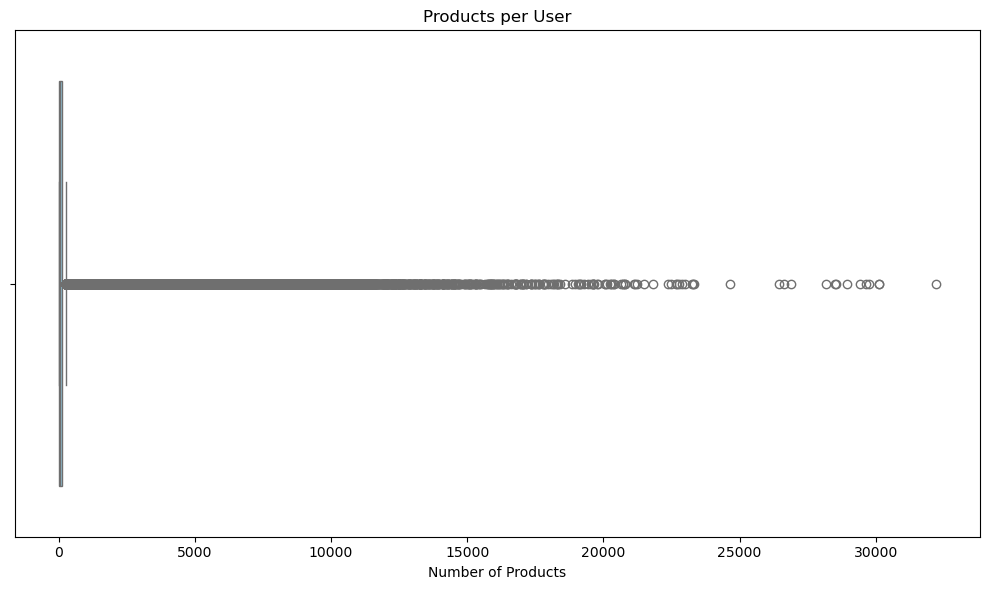

In [45]:
users = df_users.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='products', data=users, color='skyblue')
plt.title('Products per User')
plt.xlabel('Number of Products')
plt.tight_layout()
plt.show()

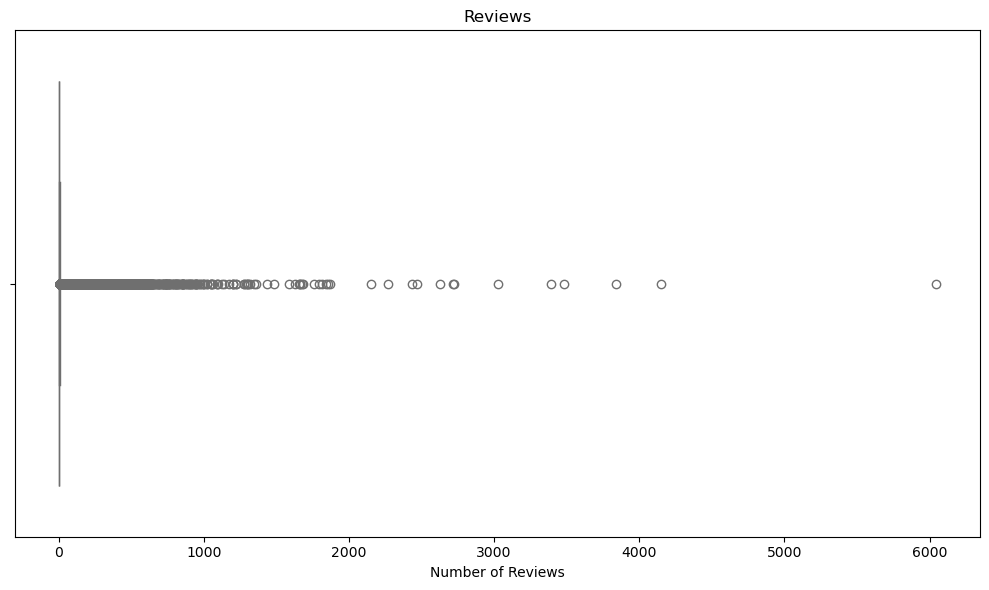

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='reviews', data=users, color='skyblue')
plt.title('Reviews')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.show()

In [47]:
# Choose the numeric columns to normalize
numeric_cols = ['products', 'reviews']

# Fit scaler and transform
scaler = MinMaxScaler()
df_users[numeric_cols] = scaler.fit_transform(df_users[numeric_cols])

In [57]:
df_users

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
...,...,...,...
14306059,5047430,6,0
14306060,5048153,0,0
14306061,5059205,31,0
14306062,5074363,0,0


In [58]:
common_user_ids = recommendations['user_id'].unique()   # all game IDs in df2
users = df_users[df_users['user_id'].isin(common_user_ids)].copy()

In [59]:
users

,user_id,products,reviews
28,13731271,587,3
44,4586753,381,2
52,5105530,224,8
60,5858967,305,12
86,7650936,536,3
...,...,...,...
14305707,4724079,48,28
14305721,4728899,10,1
14305736,4733965,2,1
14305785,4772598,17,1


In [60]:
from load_data import save_preprocessed_data

# Save the preprocessed DataFrames
save_preprocessed_data(recommendations_df, games_processed)

DataFrames have been saved successfully!


In [ ]:
#Training, Test and Validation Split
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Filter to a manageable number of users
sampled_users = df_recommendations["user_id"]
df_small = df_recommendations[df_recommendations["user_id"].isin(sampled_users)]

# Step 2: Per-user train/val/test split without timestamp
train_rows, val_rows, test_rows = [], [], []

for user_id, group in df_small.groupby("user_id"):
    if len(group) < 3:
        continue

    user_train, user_temp = train_test_split(group, test_size=0.3, random_state=42)
    if len(user_temp) < 2:
        continue
    user_val, user_test = train_test_split(user_temp, test_size=0.5, random_state=42)

    train_rows.append(user_train)
    val_rows.append(user_val)
    test_rows.append(user_test)

df_train = pd.concat(train_rows)
df_val = pd.concat(val_rows)
df_test = pd.concat(test_rows)

# ✅ True Cold Start: Pull from df_users those with no interactions at all
all_known_users = set(df_users["user_id"].unique())
users_with_history = set(df_recommendations["user_id"].unique())
pure_cold_users = list(all_known_users - users_with_history)

# Sample and add to test set
import random
sampled_pure_cold_users = random.sample(pure_cold_users, min(40, len(pure_cold_users)))

df_fake_cold_test = pd.DataFrame({
    "user_id": sampled_pure_cold_users,
    "app_id": [None] * len(sampled_pure_cold_users)
})

df_test_expanded = pd.concat([df_test, df_fake_cold_test], ignore_index=True)

print(f"✅ Final split complete: Train={len(df_train)}, Val={len(df_val)}, Test={len(df_test)}, Test+Cold={len(df_test_expanded)}")